In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("sample.csv" , header=None, names = range(5))
df.head()

,0,1,2,3,4
0,Burger,Fries,Coke,NaN,NaN
1,Pizza,Nuggets,Milkshake,NaN,NaN
2,Fries,Coke,Nuggets,Salad,NaN
3,Burger,Fries,Sandwich,Coffee,NaN
4,Pizza,Coke,Ice Cream,NaN,NaN


In [9]:
transactions = []
for i in range(df.shape[0]):
    transactions.append([str(df.values[i,j]) for j in range(df.shape[1]) if str(df.values[i,j]) != 'nan'])

In [10]:
print(transactions[:4])

[['Burger', 'Fries', 'Coke'], ['Pizza', 'Nuggets', 'Milkshake'], ['Fries', 'Coke', 'Nuggets', 'Salad'], ['Burger', 'Fries', 'Sandwich', 'Coffee']]


In [11]:
from mlxtend.preprocessing import TransactionEncoder

In [12]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [13]:
df_encoded.head()

,Burger,Coffee,Coke,Fries,Ice Cream,Milkshake,Nuggets,Pizza,Salad,Sandwich
0,True,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,False,False
2,False,False,True,True,False,False,True,False,True,False
3,True,True,False,True,False,False,False,False,False,True
4,False,False,True,False,True,False,False,True,False,False


In [14]:
from mlxtend.frequent_patterns import apriori, association_rules

In [15]:
frequent_itemsets = apriori(df_encoded, min_support=0.020, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.350,(Burger)
1,0.300,(Coffee)
2,0.500,(Coke)
3,0.525,(Fries)
4,0.300,(Ice Cream)
...,...,...
164,0.025,"(Coke, Sandwich, Pizza, Salad)"
165,0.025,"(Nuggets, Sandwich, Fries, Pizza)"
166,0.025,"(Nuggets, Sandwich, Fries, Salad)"
167,0.025,"(Coke, Fries, Salad, Burger, Milkshake)"


In [16]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Coke),(Burger),0.500,0.350,0.175,0.350000,1.000000,1.0,0.000000,1.000000,0.000000,0.259259,0.000000,0.425000
1,(Burger),(Coke),0.350,0.500,0.175,0.500000,1.000000,1.0,0.000000,1.000000,0.000000,0.259259,0.000000,0.425000
2,(Fries),(Burger),0.525,0.350,0.225,0.428571,1.224490,1.0,0.041250,1.137500,0.385965,0.346154,0.120879,0.535714
3,(Burger),(Fries),0.350,0.525,0.225,0.642857,1.224490,1.0,0.041250,1.330000,0.282051,0.346154,0.248120,0.535714
4,(Milkshake),(Burger),0.350,0.350,0.200,0.571429,1.632653,1.0,0.077500,1.516667,0.596154,0.400000,0.340659,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,"(Coke, Pizza, Burger)","(Nuggets, Fries)",0.050,0.225,0.025,0.500000,2.222222,1.0,0.013750,1.550000,0.578947,0.100000,0.354839,0.305556
363,"(Nuggets, Fries, Pizza)","(Coke, Burger)",0.075,0.175,0.025,0.333333,1.904762,1.0,0.011875,1.237500,0.513514,0.111111,0.191919,0.238095
364,"(Nuggets, Pizza, Burger)","(Coke, Fries)",0.050,0.225,0.025,0.500000,2.222222,1.0,0.013750,1.550000,0.578947,0.100000,0.354839,0.305556
365,"(Fries, Pizza, Burger)","(Coke, Nuggets)",0.050,0.150,0.025,0.500000,3.333333,1.0,0.017500,1.700000,0.736842,0.142857,0.411765,0.333333


In [17]:
rules[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
0,(Coke),(Burger),0.175,0.350000,1.000000
1,(Burger),(Coke),0.175,0.500000,1.000000
2,(Fries),(Burger),0.225,0.428571,1.224490
3,(Burger),(Fries),0.225,0.642857,1.224490
4,(Milkshake),(Burger),0.200,0.571429,1.632653
...,...,...,...,...,...
362,"(Coke, Pizza, Burger)","(Nuggets, Fries)",0.025,0.500000,2.222222
363,"(Nuggets, Fries, Pizza)","(Coke, Burger)",0.025,0.333333,1.904762
364,"(Nuggets, Pizza, Burger)","(Coke, Fries)",0.025,0.500000,2.222222
365,"(Fries, Pizza, Burger)","(Coke, Nuggets)",0.025,0.500000,3.333333


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
rules = rules.sort_values(by='lift', ascending=False).head(10)

/var/folders/4t/vs5qysxx43g3rk4xndql7pk00000gn/T/ipykernel_3787/3351772918.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=rules['lift'], y=rules['antecedents'].apply(lambda x: ', '.join(list(x))), ci=None)


<function matplotlib.pyplot.show(close=None, block=None)>

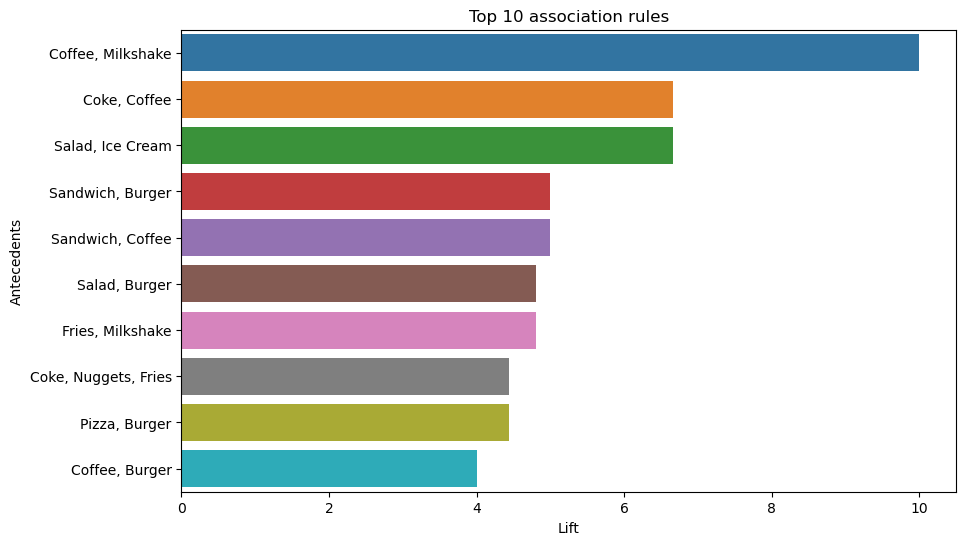

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=rules['lift'], y=rules['antecedents'].apply(lambda x: ', '.join(list(x))), ci=None)
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.title('Top 10 association rules')
plt.show

In [23]:
import pandas as pd
import random

# Define a list of possible food items
food_items = [
    "Burger", "Fries", "Coke", "Pizza", "Pasta", "Salad", "Nuggets",
    "Ice Cream", "Coffee", "Tea", "Hot Dog", "Sandwich", "Smoothie",
    "Taco", "Sushi", "Donut", "Milkshake", "Wrap", "Fried Chicken", "Muffin"
]

In [24]:
transactions1 = []
for _ in range(500):
    num_items = random.randint(2,6)
    transaction = random.sample(food_items,num_items)
    transactions1.append(transaction)

In [26]:
df1 = pd.DataFrame(transactions1)

In [27]:
df1.head()

,0,1,2,3,4,5
0,Pizza,Sandwich,Sushi,Burger,None,None
1,Fries,Donut,None,None,None,None
2,Tea,Burger,Milkshake,Muffin,Smoothie,None
3,Fried Chicken,Donut,Coffee,None,None,None
4,Muffin,Wrap,Hot Dog,Taco,Tea,Donut


In [28]:
df1.to_csv('randomData.csv', index=False,header=False)

In [29]:
randomData = pd.read_csv('randomData.csv', header=None)

In [30]:
randomData.head()

,0,1,2,3,4,5
0,Pizza,Sandwich,Sushi,Burger,NaN,NaN
1,Fries,Donut,NaN,NaN,NaN,NaN
2,Tea,Burger,Milkshake,Muffin,Smoothie,NaN
3,Fried Chicken,Donut,Coffee,NaN,NaN,NaN
4,Muffin,Wrap,Hot Dog,Taco,Tea,Donut


In [31]:
transactions_random = []
for i in range(randomData.shape[0]):
    transactions_random.append([str(randomData.values[i,j]) for j in range(randomData.shape[1]) if str(randomData.values[i,j])!='nan'])

In [32]:
transactions_random[:3]

[['Pizza', 'Sandwich', 'Sushi', 'Burger'],
 ['Fries', 'Donut'],
 ['Tea', 'Burger', 'Milkshake', 'Muffin', 'Smoothie']]

In [33]:
t_encoder = TransactionEncoder()
t_array1 = t_encoder.fit(transactions_random).transform(transactions_random)
encoded_df = pd.DataFrame(t_array1, columns=t_encoder.columns_)

In [39]:
encoded_df.head()

,Burger,Coffee,Coke,Donut,Fried Chicken,Fries,Hot Dog,Ice Cream,Milkshake,Muffin,Nuggets,Pasta,Pizza,Salad,Sandwich,Smoothie,Sushi,Taco,Tea,Wrap
0,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False
1,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False
3,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,True,True


In [40]:
itemsets = apriori(encoded_df, min_support=0.02, use_colnames=True)
itemsets

,support,itemsets
0,0.220,(Burger)
1,0.194,(Coffee)
2,0.204,(Coke)
3,0.202,(Donut)
4,0.192,(Fried Chicken)
...,...,...
202,0.038,"(Sushi, Tea)"
203,0.046,"(Wrap, Sushi)"
204,0.030,"(Taco, Tea)"
205,0.032,"(Wrap, Taco)"


In [60]:
rules1 = association_rules(itemsets, metric='confidence', min_threshold=0.002)
rules1[['antecedents','consequents','support','confidence','lift']]

,antecedents,consequents,support,confidence,lift
0,(Coffee),(Burger),0.034,0.175258,0.796626
1,(Burger),(Coffee),0.034,0.154545,0.796626
2,(Coke),(Burger),0.044,0.215686,0.980392
3,(Burger),(Coke),0.044,0.200000,0.980392
4,(Donut),(Burger),0.042,0.207921,0.945095
...,...,...,...,...,...
369,(Tea),(Taco),0.030,0.145631,0.791473
370,(Wrap),(Taco),0.032,0.168421,0.915332
371,(Taco),(Wrap),0.032,0.173913,0.915332
372,(Wrap),(Tea),0.032,0.168421,0.817578


In [52]:
rules1 = rules1.sort_values(by='lift', ascending=False).head(10)

/var/folders/4t/vs5qysxx43g3rk4xndql7pk00000gn/T/ipykernel_3787/3543863286.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=rules1['lift'], y=rules1['antecedents'].apply(lambda x: ', '.join(list(x))), ci=None)


<function matplotlib.pyplot.show(close=None, block=None)>

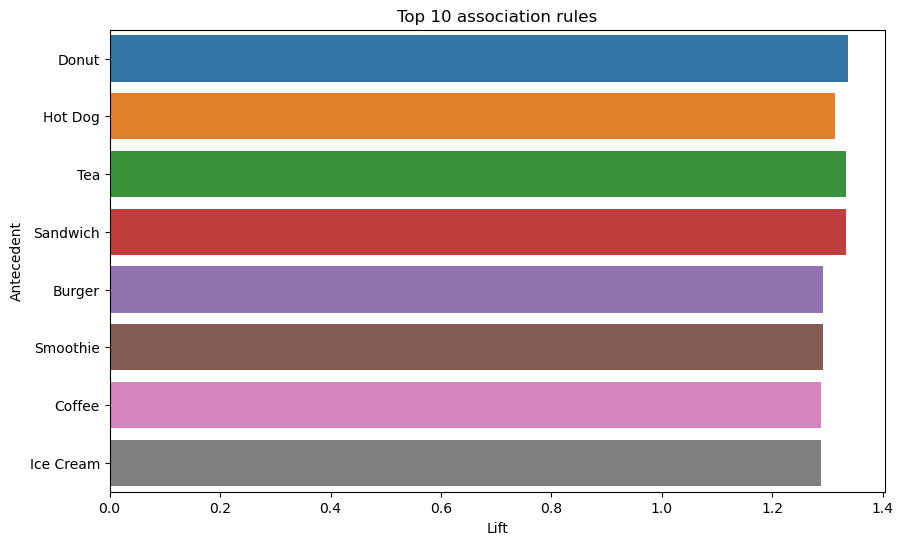

In [53]:
plt.figure(figsize=(10,6))
sns.barplot(x=rules1['lift'], y=rules1['antecedents'].apply(lambda x: ', '.join(list(x))), ci=None)
plt.xlabel('Lift')
plt.ylabel('Antecedent')
plt.title("Top 10 association rules")
plt.show